### Step1. [Import dataset]

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
hos = pd.read_csv("diabetes.csv")

In [3]:
hos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
hos.shape

(768, 9)

In [5]:
hos.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
hos.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
hos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
hos.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

### Step2. [Identify relationships between feature]

<AxesSubplot:>

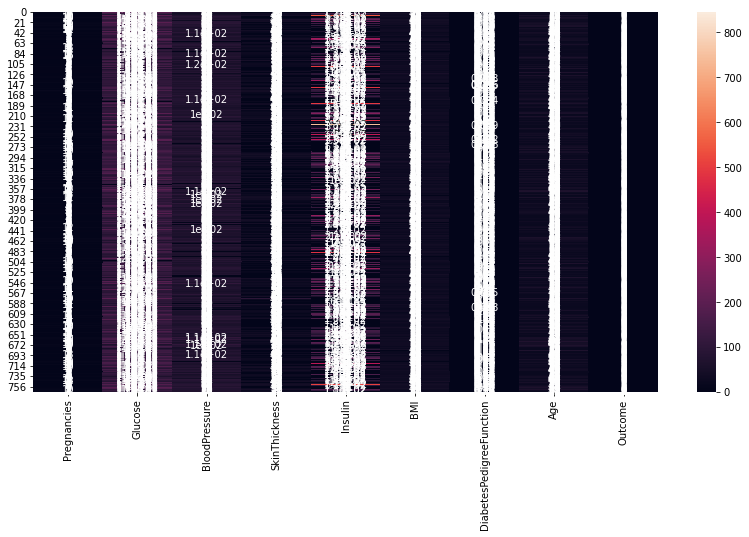

In [9]:
plt.figure(figsize=(14,7))
sns.heatmap(data=hos,annot=True)

### Step3. [Prediction using one feature]

In [10]:
X=hos[['Age']]

In [11]:
y=hos.Outcome

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model1 = LogisticRegression()

In [16]:
model1.fit(X,y)

LogisticRegression()

In [17]:
model1.coef_

array([[0.04202466]])

In [18]:
model1.intercept_

array([-2.04744865])

In [19]:
model1.predict([[60]])

array([1], dtype=int64)

In [20]:
lrf = model1.coef_ * 60 + model1.intercept_
from scipy.special import expit
if expit(lrf) > 0.5:
    print(expit(lrf))
    print('YES, he will become diabetic')
else:
    print("NO, he will not be diabetic")

[[0.61633741]]
YES, he will become diabetic


### Step4. [Prediction using many features]

In [21]:
X_=hos[['Age','BMI','Glucose']]

In [22]:
model2 = LogisticRegression()

In [23]:
model2.fit(X_,y)

LogisticRegression()

In [24]:
model2.predict([[40,30,150]])

array([1], dtype=int64)

In [25]:
model2.coef_

array([[0.03015421, 0.08157404, 0.03251154]])

In [26]:
model2.intercept_

array([-8.39311252])

In [27]:
lrf1 = model2.coef_[0][0] * 40 + model2.coef_[0][1]*30 + model2.coef_[0][2]*150 + model2.intercept_
from scipy.special import expit
if expit(lrf1) > 0.5:
    print(expit(lrf1))
    print('YES, he will become diabetic')
else:
    print("NO, he will not be diabetic")

[0.53419838]
YES, he will become diabetic


In [28]:
model2.predict_proba([[150,30,40]])

array([[0.53053646, 0.46946354]])

### Step5. [Build LoR model with all features]

In [29]:
aX = hos.drop('Outcome',axis=1)

In [30]:
model3 = LogisticRegression()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(aX,y,train_size=0.8,test_size=0.2)

In [33]:
model3.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_test

583    0
224    0
647    1
322    1
751    0
      ..
735    0
548    0
574    0
209    1
516    1
Name: Outcome, Length: 154, dtype: int64

In [35]:
y_pred = model3.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
print("LoR AUC  ",roc_auc_score(y_test,y_pred))

LoR AUC   0.7017894536455358


### Step6. [Forward Selection Procedure]

In [38]:
type(hos.columns)

pandas.core.indexes.base.Index

In [39]:
def auc(var,tar,df):
    fX = df[var]
    fy = df[tar]
    logreg = LogisticRegression()
    logreg.fit(fX,fy)
    pred=logreg.predict_proba(fX)[:,1]
    auc_val = roc_auc_score(y,pred)
    return auc_val

In [40]:
print(auc(["BMI","Glucose"],["Outcome"],hos))

0.8109328358208956


In [41]:
print(auc(['Pregnancies', 'BloodPressure', 'SkinThickness'],["Outcome"],hos))

0.6444962686567164


In [42]:
def next_best(current,cand,tar,df):
    best_auc = -1
    best_var = None
    for i in cand:
        auc_v = auc(current+[i],tar,df)
        if auc_v>=best_auc:
            best_auc = auc_v
            best_var = i
    return best_var        

In [43]:
tar = ["Outcome"]
current = ['Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
cand = ['Pregnancies', 'BloodPressure', 'SkinThickness'] 
next_var = next_best(current,cand,tar,hos)
print(next_var)

SkinThickness


In [44]:
tar = ["Outcome"]
current = []
cand = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
max_num = 5 
num_it = min(max_num,len(cand))
for i in range(0,num_it):
    next_var = next_best(current,cand,tar,hos)
    current = current + [next_var]
    cand.remove(next_var)
    print("Variable added in step " + str(i+1)  + " is " + next_var + ".")
print(current)    

Variable added in step 1 is Glucose.
Variable added in step 2 is BMI.
Variable added in step 3 is Pregnancies.
Variable added in step 4 is DiabetesPedigreeFunction.
Variable added in step 5 is BloodPressure.
['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']


### Step7. [Plot Line graph of AUC values and select cut-off]

In [45]:
X_train,X_test,y_train,y_test = train_test_split(aX,y,test_size = 0.5,stratify =y)

In [46]:
pred2 = model3.predict_proba(X_test)

In [47]:
train = pd.concat([X_train,y_train], axis=1)
test = pd.concat([X_test,y_test], axis=1)

In [48]:
def auc_train_test(variables,target,train,test):
    X_train = train[variables]
    X_test = test[variables]
    Y_train = train[target]
    Y_test = test[target]
    logreg = LogisticRegression()
    
    # Fit the model on train data
    logreg.fit(X_train, Y_train)
    
    # Calculate the predictions both on train and test data
    predictions_train = logreg.predict_proba(X_train)[:,1]
    predictions_test = logreg.predict_proba(X_test)[:,1]
    
    # Calculate the AUC both on train and test data
    auc_train = roc_auc_score(Y_train, predictions_train)
    auc_test = roc_auc_score(Y_test,predictions_test)
    return(auc_train, auc_test)

In [49]:
auc_values_train = []
auc_values_test = []
variables_evaluate = []

# Iterate over the variables in variables
for v in aX.columns:
  
    # Add the variable
    variables_evaluate.append(v)
    
    # Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate,["Outcome"],train,test)
    
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)
    

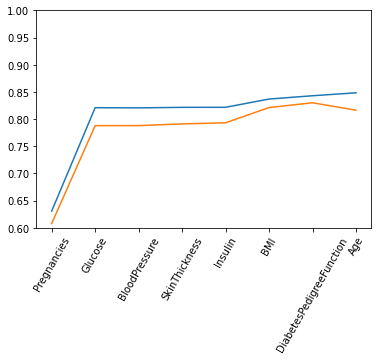

In [50]:
# Make plot of the AUC values
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(0,len(auc_values_train)))
my_train = np.array(auc_values_train)
my_test = np.array(auc_values_test)
plt.xticks(x,aX.columns,rotation=60)
plt.plot(x,my_train)
plt.plot(x,my_test)
plt.ylim((0.6,1.0))
plt.show()

### Step8. [Draw Cumulative Gain Chart and Lift Chart]

In [52]:
import scikitplot as skplt

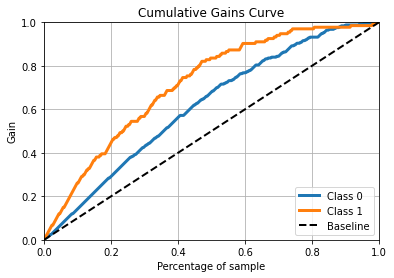

In [53]:
skplt.metrics.plot_cumulative_gain(y_test,pred2)
plt.show()

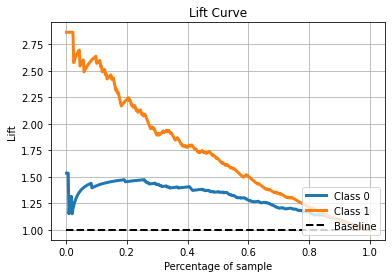

In [54]:
skplt.metrics.plot_lift_curve(y_test,pred2)
plt.show()